### Assignment 4 : ML2 Clustering

6330166021 Nuttapol Onton

In [29]:
# import libraries

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

1. Load the "ModifiedEdibleMushroom.csv" data from the link below (note: this data set has been preliminarily prepared.) again.

In [30]:
# !wget "https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv"
df = pd.read_csv('hed2020_dataset.csv')
df.shape

(5824, 24)

2. Choose edible mushrooms only.

In [31]:
df = df[df['label'] == 'e']
df[:10]

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0
5,6,e,x,y,t,a,f,c,b,e,...,o,p,k,n,g,2.0,1.0,1.0,1.0,1.0
6,7,e,b,s,t,a,f,c,b,e,...,o,p,k,n,m,3.0,2.0,1.0,1.0,1.0
7,8,e,b,y,t,l,f,c,b,e,...,o,p,n,s,m,3.0,1.0,1.0,1.0,1.0
9,10,e,b,s,t,a,f,c,b,e,...,o,p,k,s,m,2.0,2.0,1.0,1.0,1.0
10,11,e,x,y,t,l,f,c,b,e,...,o,p,n,n,g,2.0,2.0,1.0,1.0,1.0
11,12,e,x,y,t,a,f,c,b,e,...,o,p,k,s,m,2.0,1.0,1.0,1.0,1.0
12,13,e,b,s,t,a,f,c,b,e,...,o,p,n,s,g,2.0,5.0,1.0,1.0,1.0


3.  Only the variables below have been selected to describe the distinctive characteristics of edible mushrooms

In [32]:
df = df[['cap-color-rate','stalk-color-above-ring-rate']]
df[:10]

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0
7,3.0,1.0
9,2.0,1.0
10,2.0,1.0
11,2.0,1.0
12,2.0,1.0


4. Provide a proper data preprocessing as follows:

    - Fill missing with mean 

    - Standardize variables with Standard Scaler

In [33]:
# Fill missing with mean
print("-----------before-------------")
print(df[df.columns].isnull().sum())
print("-----------after-------------")
df.fillna(df.mean(), inplace = True)
print(df[df.columns].isnull().sum())


-----------before-------------
cap-color-rate                  6
stalk-color-above-ring-rate    28
dtype: int64
-----------after-------------
cap-color-rate                 0
stalk-color-above-ring-rate    0
dtype: int64


2104


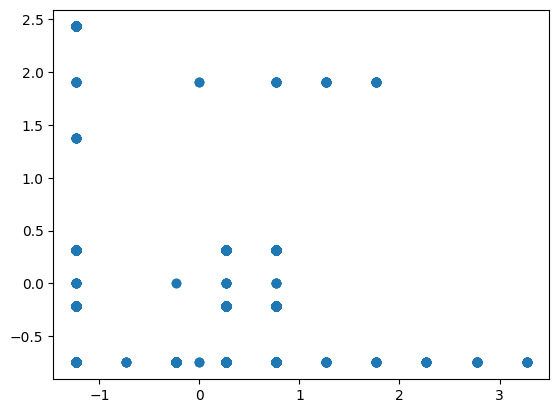

In [34]:
# Standardize variables with Standard Scaler
col = df.columns
scaler = StandardScaler().set_output(transform="pandas")
std_df = scaler.fit_transform(df[col])
print(df.shape[0])

#visualization
plt.scatter(std_df["cap-color-rate"], std_df["stalk-color-above-ring-rate"])
plt.show()

5. K-means clustering with 5 clusters and seed = 2020.

In [35]:
kmean = KMeans(random_state= 2020, n_clusters=5)
kmean.fit(std_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2020)

6. Show the centroid of each cluster.

In [36]:
cluster_centers = kmean.cluster_centers_
cluster_centers

array([[ 0.41361805, -0.37536859],
       [-1.23582983,  2.30658376],
       [-1.22906193, -0.29354739],
       [ 2.5059661 , -0.74760802],
       [ 1.2093128 ,  1.90272369]])

7. Convert the centroid value to the original scale

In [37]:
mean = df.mean()
sd = df.std()
converted_cluster_centers = centroids = scaler.inverse_transform(cluster_centers)
converted_cluster_centers


array([[4.2934616 , 1.70225065],
       [1.        , 6.76190476],
       [1.01351351, 1.85661095],
       [8.47126437, 1.        ],
       [5.88222965, 6.        ]])

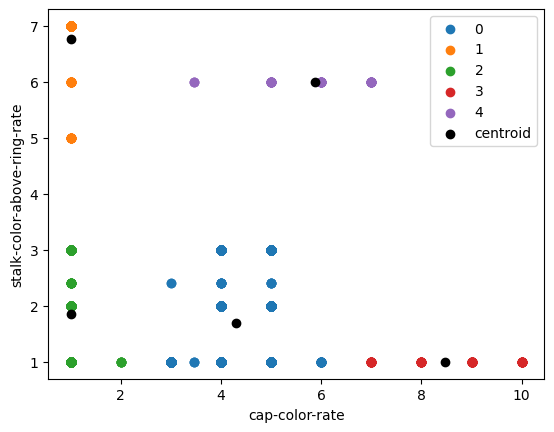

In [38]:
#Answer Question2 in MCV

label = kmean.labels_
u_label = np.unique(label)
df['cluster'] = label
for i in u_label:
    plt.scatter(df[df['cluster'] == i]['cap-color-rate'] , df[df['cluster'] == i]['stalk-color-above-ring-rate'] , label = i)
x_centroid = [x[0] for x in converted_cluster_centers]
y_centroid = [x[1] for x in converted_cluster_centers]
plt.scatter(x_centroid, y_centroid, color = 'black', label = 'centroid')
plt.xlabel('cap-color-rate')
plt.ylabel('stalk-color-above-ring-rate')
plt.legend()
plt.show()
